## Gameplan
1. apply the Weekday and time of day function. 
1. Combine the time with Date 
1. Sort the Data by Date- Reset Indices
1. Apply Lewis's Formula for grouping
1. Clean up the data by removing blank/negative rows
1. Group the data by Station and Mean Traffic
1. Start Graphing!

In [161]:
import pandas as pd
pd.set_option('display.max_rows', 500)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('Turnstile_Usage_Data__2018.csv')
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [66]:
#Clean up the column Names
new_col_names = [name.strip() for name in df.columns]
df.columns = new_col_names

In [67]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,R232A,R176,03-06-00,33 ST,6,IRT,12/23/2017,20:00:00,REGULAR,102417472,68072550
1,R409,R449,01-00-02,E 149 ST,6,IRT,12/23/2017,08:00:00,REGULAR,1985376,6042304
2,R256,R182,00-00-02,116 ST,6,IRT,12/23/2017,04:00:00,REGULAR,765700,471312
3,R246,R177,00-03-02,68ST-HUNTER CO,6,IRT,12/23/2017,20:00:00,REGULAR,14882041,10581878
4,R227,R131,00-00-05,23 ST,6,IRT,12/23/2017,08:00:00,REGULAR,1524615,537740


### 1. apply the Weekday and time of day function. 

In [68]:
def Add_Weekday(data_frame, column='Date'):
    dmap = {0:'Mon', 1: 'Tue', 2: 'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
    #Convert column to date
    data_frame[column] = pd.to_datetime(data_frame[column])
    #Add column which shows the Weekday in integer
    data_frame['Day_Number'] = data_frame[column].apply(lambda x: x.dayofweek)
    #Add column which shows the Weekday in words
    data_frame['Weekday'] = data_frame['Day_Number'].map(dmap)
    return data_frame


def DayTime(data_frame, column='Time'):
    #Extract the Hour from the Time Column
    data_frame['Hour'] = data_frame[column].apply(lambda x: int(x.split(':')[0]))
    #Use the Hour column to create a Column which distinguishes time of day
    data_frame.loc[(data_frame['Hour'] >= 8) & (data_frame['Hour'] <= 18), 'Time_of_Day'] = 'Worktime'
    data_frame.loc[(data_frame['Hour'] > 18) & (data_frame['Hour'] <= 24), 'Time_of_Day'] = 'Evening'
    data_frame.loc[(data_frame['Hour'] < 8), 'Time_of_Day'] = 'Late'
    
    return data_frame

In [69]:
df = Add_Weekday(df)
df = DayTime(df)

In [70]:
#Create Copy for a backup
df[(df['Station']=='ASTOR PL') & (df['SCP']=='00-00-02')].head(5)
dfc = df.copy()

### 2. Combine the time with Date 


In [71]:
#Combine Date and Hour
def DateTimeHour(dataframe, date, hour):
    dataframe['New_Date'] = dataframe[date] + pd.to_timedelta(dataframe[hour], unit='h')
    return dataframe

In [72]:
dfc = DateTimeHour(dfc, 'Date', 'Hour')

In [73]:
dfc.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Day_Number,Weekday,Hour,Time_of_Day,New_Date
0,R232A,R176,03-06-00,33 ST,6,IRT,2017-12-23,20:00:00,REGULAR,102417472,68072550,5,Sat,20,Evening,2017-12-23 20:00:00
1,R409,R449,01-00-02,E 149 ST,6,IRT,2017-12-23,08:00:00,REGULAR,1985376,6042304,5,Sat,8,Worktime,2017-12-23 08:00:00
2,R256,R182,00-00-02,116 ST,6,IRT,2017-12-23,04:00:00,REGULAR,765700,471312,5,Sat,4,Late,2017-12-23 04:00:00
3,R246,R177,00-03-02,68ST-HUNTER CO,6,IRT,2017-12-23,20:00:00,REGULAR,14882041,10581878,5,Sat,20,Evening,2017-12-23 20:00:00
4,R227,R131,00-00-05,23 ST,6,IRT,2017-12-23,08:00:00,REGULAR,1524615,537740,5,Sat,8,Worktime,2017-12-23 08:00:00


### 3. Sort the Data by Date - Reset Indices

In [74]:
dfc_sort = dfc.sort_values(by=['New_Date']).reset_index()

In [75]:
dfc_sort[(dfc_sort['Station']=='ASTOR PL') & (dfc_sort['SCP']=='00-00-02')].head()


,index,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Day_Number,Weekday,Hour,Time_of_Day,New_Date
196,1198,R219,R160,00-00-02,ASTOR PL,6,IRT,2017-12-23,00:00:00,REGULAR,16139802,1822800,5,Sat,0,Late,2017-12-23 00:00:00
439,377,R219,R160,00-00-02,ASTOR PL,6,IRT,2017-12-23,04:00:00,REGULAR,16139923,1822804,5,Sat,4,Late,2017-12-23 04:00:00
677,1291,R219,R160,00-00-02,ASTOR PL,6,IRT,2017-12-23,08:00:00,REGULAR,16139959,1822807,5,Sat,8,Worktime,2017-12-23 08:00:00
911,1168,R219,R160,00-00-02,ASTOR PL,6,IRT,2017-12-23,12:00:00,REGULAR,16140066,1822830,5,Sat,12,Worktime,2017-12-23 12:00:00
1113,1524,R219,R160,00-00-02,ASTOR PL,6,IRT,2017-12-23,16:00:00,REGULAR,16140336,1822863,5,Sat,16,Worktime,2017-12-23 16:00:00


### 4. Apply Lewis's Formula for grouping

In [76]:
dfc_sort['Entry_Diff']=dfc_sort.groupby(['Station','Unit','SCP'])['Entries'].diff(1)
dfc_sort['Exit_Diff']=dfc_sort.groupby(['Station','Unit','SCP'])['Exits'].diff(1)
dfc_sort['Total_Traffic']=dfc_sort['Entry_Diff']+dfc_sort['Exit_Diff']

### 5. Clean up the data by removing Negatives and removing the initial rows with no Entry_Diff Values
Looking at the data, there are several outlier datapoints (Very Large, Very Small) for Entries that are throwing off the numbers.  Not sure if these are anomolies or errors in data collection but according to the MTA Data Overview file provided by MTA: 

"The data is broken down to Daily and Hourly periods. The data is 10 digits long and will roll-over to zero (0) on over-flow. Other factors that may impact the data are:
- Hardware failure where the hard drive needs to be replaced, and initialized.
- Data corruption from faulty devices, or heavy banging on the turnstile "

In [216]:
#Remove the Negaticves
dfc_clean = dfc_sort[(dfc_sort['Entry_Diff']>=0) & \
                    (dfc_sort['Exit_Diff']>=0) & \
                    (dfc_sort['Total_Traffic']>=0)]

In [217]:
#Remove the Very Large Numbers
dfc_clean.sort_values(by='Entry_Diff', ascending=False).head(5)

,index,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Day_Number,Weekday,Hour,Time_of_Day,New_Date,Entry_Diff,Exit_Diff,Total_Traffic
391981,391216,R412,R146,00-03-03,HUNTS POINT AV,6,IRT,2018-08-21,17:00:00,REGULAR,318815944,117441759,1,Tue,17,Worktime,2018-08-21 17:00:00,317531761.0,116931580.0,434463341.0
541871,542041,R256,R182,00-00-03,116 ST,6,IRT,2018-12-08,12:00:00,REGULAR,193068833,470548628,5,Sat,12,Worktime,2018-12-08 12:00:00,192459535.0,470100947.0,662560482.0
553214,552937,R415,R120,00-05-00,MORISN AV/SNDVW,6,IRT,2018-12-15,15:00:00,REGULAR,917505,0,5,Sat,15,Worktime,2018-12-15 15:00:00,458752.0,0.0,458752.0
408578,408701,R417,R222,00-00-01,PARKCHESTER,6,IRT,2018-09-08,01:00:00,REGULAR,2510990,269627,5,Sat,1,Late,2018-09-08 01:00:00,32017.0,1918.0,33935.0
497048,498022,R251,R144,00-03-02,96 ST,6,IRT,2018-11-10,00:00:00,REGULAR,2154518,266413,5,Sat,0,Late,2018-11-10 00:00:00,31380.0,3519.0,34899.0


In [218]:
dfc_clean = dfc_clean.drop(dfc_clean[dfc_clean['Entry_Diff'] > 1000000].index)
dfc_clean.sort_values(by='Total_Traffic', ascending=False).head(5)

,index,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Day_Number,Weekday,Hour,Time_of_Day,New_Date,Entry_Diff,Exit_Diff,Total_Traffic
553214,552937,R415,R120,00-05-00,MORISN AV/SNDVW,6,IRT,2018-12-15,15:00:00,REGULAR,917505,0,5,Sat,15,Worktime,2018-12-15 15:00:00,458752.0,0.0,458752.0
497211,497053,R226,R131,02-00-00,23 ST,6,IRT,2018-11-10,00:00:00,REGULAR,1998942940,1545799815,5,Sat,0,Late,2018-11-10 00:00:00,26902.0,14576.0,41478.0
497166,497442,R220,R160,01-03-02,ASTOR PL,6,IRT,2018-11-10,00:00:00,REGULAR,3285472,10188213,5,Sat,0,Late,2018-11-10 00:00:00,10260.0,28741.0,39001.0
497175,498242,R246,R177,00-03-06,68ST-HUNTER CO,6,IRT,2018-11-10,00:00:00,REGULAR,465778,495496,5,Sat,0,Late,2018-11-10 00:00:00,19328.0,19360.0,38688.0
497224,498507,R246,R177,00-00-00,68ST-HUNTER CO,6,IRT,2018-11-10,00:00:00,REGULAR,26810653,15462655,5,Sat,0,Late,2018-11-10 00:00:00,25422.0,12085.0,37507.0


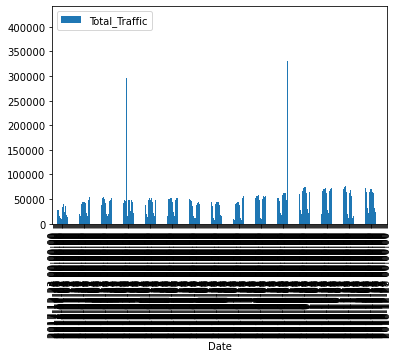

In [219]:
#Let's just plot a random station by date and see what it looks like:
data = dfc_clean.groupby(['Station','Date'])['Total_Traffic'].sum().reset_index()
data[data['Station']=='23 ST'].plot.bar(x='Date', y='Total_Traffic')

### Observations: For whatever reason, I tested on many stations and all stations had a spike on 3/17/2018 and 09/08/2018.  Let's Analyze

In [220]:
#Let's just plot a random station by date and see what it looks like:
data = dfc_clean.groupby(['Station','Date'])['Total_Traffic'].sum().reset_index()

data[data['Date']>'2018-03-01'].head(10)
#data[data['Date']>'2018-08-25'].head(10)


,Station,Date,Total_Traffic
69,103 ST,2018-03-02,22800.0
70,103 ST,2018-03-03,15148.0
71,103 ST,2018-03-04,12017.0
72,103 ST,2018-03-05,25287.0
73,103 ST,2018-03-06,25657.0
74,103 ST,2018-03-07,20429.0
75,103 ST,2018-03-08,25070.0
76,103 ST,2018-03-09,25415.0
77,103 ST,2018-03-17,146460.0
78,103 ST,2018-03-18,9268.0


#### It seems like there 2 stoppages in data collection between those 2 dates which is causing the daily average to be off.  Due to this I will just delete any row with these dates

In [240]:


indexNames = dfc_clean[ (dfc_clean['Date'] == '2018-03-17') |\
                       (dfc_clean['Date'] == '2018-09-08') |\
                      (dfc_clean['Date'] == '2018-11-10')].index
dfc_clean2 = dfc_clean.drop(indexNames)


In [241]:
data2 = dfc_clean2.groupby(['Station','Date'])['Total_Traffic'].sum().reset_index()
data2[data2['Date']>'2018-03-01'].head(10)


,Station,Date,Total_Traffic
69,103 ST,2018-03-02,22800.0
70,103 ST,2018-03-03,15148.0
71,103 ST,2018-03-04,12017.0
72,103 ST,2018-03-05,25287.0
73,103 ST,2018-03-06,25657.0
74,103 ST,2018-03-07,20429.0
75,103 ST,2018-03-08,25070.0
76,103 ST,2018-03-09,25415.0
77,103 ST,2018-03-18,9268.0
78,103 ST,2018-03-19,25403.0


### 6. Now that the data is clean, can group the Total Traffic by Date and by Station

In [242]:
dfc_analysis = dfc_clean2.groupby(['Date', 'Station'])['Entry_Diff', 'Exit_Diff', 'Total_Traffic'].sum().reset_index()

<ipython-input-242-f9443f38ee1a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfc_analysis = dfc_clean2.groupby(['Date', 'Station'])['Entry_Diff', 'Exit_Diff', 'Total_Traffic'].sum().reset_index()


In [243]:
dfc_analysis[(dfc_analysis['Station']=='116 ST')]


,Date,Station,Entry_Diff,Exit_Diff,Total_Traffic
2,2017-12-23,116 ST,8565.0,5402.0,13967.0
32,2017-12-24,116 ST,8478.0,6114.0,14592.0
62,2017-12-25,116 ST,5747.0,4124.0,9871.0
92,2017-12-26,116 ST,10859.0,6651.0,17510.0
122,2017-12-27,116 ST,11871.0,7284.0,19155.0
152,2017-12-28,116 ST,11837.0,7126.0,18963.0
182,2017-12-29,116 ST,11979.0,7498.0,19477.0
212,2017-12-30,116 ST,9156.0,6348.0,15504.0
242,2017-12-31,116 ST,7951.0,5417.0,13368.0
272,2018-01-01,116 ST,6105.0,4183.0,10288.0


In [244]:
dfc_Agg_Station = dfc_analysis.groupby(['Station'])['Total_Traffic'].agg(['sum', 'median', 'mean'])

In [245]:
dfc_Agg_Station.head()

,sum,median,mean
Station,,,
103 ST,7388096.0,23775.5,21352.878613
110 ST,5936071.0,18494.0,17106.832853
116 ST,7096858.0,21422.0,20811.900293
23 ST,14205216.0,44196.0,40937.221902
28 ST,6845331.0,42137.0,34572.378788


### 7. Start the Plotting!

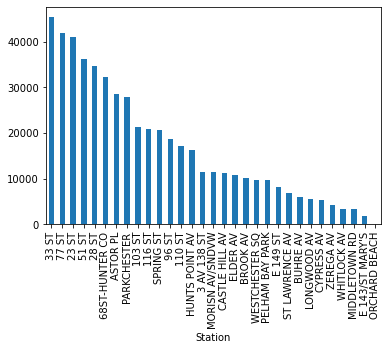

In [246]:
#Mean daily traffic for every station
dfc_Agg_Station['mean'].sort_values(ascending=False).plot.bar()

In [247]:
#Mean Daily traffic by station - Tabular Form
dfc_Agg_Station.sort_values(by=['mean'])

,sum,median,mean
Station,,,
ORCHARD BEACH,12000.0,7.5,105.263158
E 143/ST MARY'S,624952.0,2030.0,1801.014409
MIDDLETOWN RD,1139713.0,3912.0,3303.515942
WHITLOCK AV,1166268.0,3700.0,3361.002882
ZEREGA AV,1462061.0,4851.0,4213.432277
CYPRESS AV,1826874.0,6000.0,5295.286957
LONGWOOD AV,1900640.0,6248.0,5477.348703
BUHRE AV,2065348.0,6881.0,5952.011527
ST LAWRENCE AV,2370910.0,7438.0,6832.593660


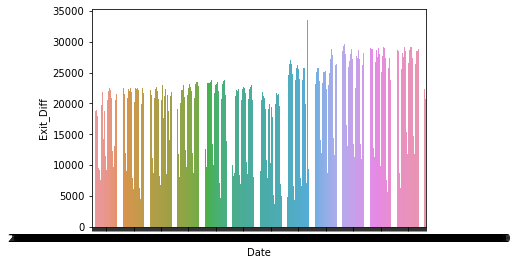

In [248]:
#Pic a station and plot by Date - 33 ST
y = dfc_analysis[dfc_analysis['Station']=='33 ST']
sns.barplot(x='Date', y=y['Exit_Diff'], data=dfc_analysis)


In [249]:
dfc_analysis[dfc_analysis['Station']=='33 ST']

,Date,Station,Entry_Diff,Exit_Diff,Total_Traffic
6,2017-12-23,33 ST,8900.0,8056.0,16956.0
36,2017-12-24,33 ST,9226.0,7361.0,16587.0
66,2017-12-25,33 ST,6079.0,5288.0,11367.0
96,2017-12-26,33 ST,17672.0,14745.0,32417.0
126,2017-12-27,33 ST,24308.0,18776.0,43084.0
156,2017-12-28,33 ST,24291.0,18867.0,43158.0
186,2017-12-29,33 ST,22636.0,17987.0,40623.0
216,2017-12-30,33 ST,12975.0,9608.0,22583.0
246,2017-12-31,33 ST,10652.0,9278.0,19930.0
276,2018-01-01,33 ST,8577.0,7561.0,16138.0


In [261]:
#Plot by Weekday at a certain Station
data = dfc_clean2.groupby(['Station', 'Weekday'])['Total_Traffic'].mean().reset_index()

In [265]:

data.head(20)

,Station,Weekday,Total_Traffic
0,103 ST,Fri,664.913641
1,103 ST,Mon,608.093917
2,103 ST,Sat,421.155012
3,103 ST,Sun,311.480916
4,103 ST,Thu,683.232609
5,103 ST,Tue,671.314965
6,103 ST,Wed,657.175633
7,110 ST,Fri,533.955184
8,110 ST,Mon,486.491333
9,110 ST,Sat,357.497090
